# Data Cleansing

Notebook in which cars data will be cleaned and translated from Spanish to English. This is a data preparation step before jumping into further analysis.

In [1]:
import pandas as pd
import numpy as np

In [2]:
root = '../data/used_cars.csv'

In [3]:
df = pd.read_csv(root)

df.head()

,title,price,year,kms,city,gear,doors,seats,power,color,...,length,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration
0,Toyota Yaris Hsd 1.5 City,9.500€,2016,40.000 km,100 cv en Madrid,"Automática continua, secuencial",5 puertas,5,100 cv,Blanco,...,389 cm,170 cm,286 l,165 km/h,"3,1 l","3,3 l","3,3 l",1.025 kg,36 l,"11,8 s"
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,43.890€,2019,24.000 km,306 cv en Salamanca,Automática secuencial,5 puertas,5,306 cv,Blanco,...,444 cm,180 cm,370 l,250 km/h,"9,3 l","6,1 l","7,3 l",1.555 kg,51 l,"4,7 s"
2,Mercedes Clase A A 250e 8g-dct,35.900€,2020,1.500 km,218 cv en Tenerife,Automática secuencial,5 puertas,5,218 cv,Gris,...,442 cm,180 cm,310 l,235 km/h,"0,0 l","0,0 l","1,4 l",1.680 kg,35 l,"6,6 s"
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8.990€,2017,53.000 km,"95 cv en Palmas, Las",Manual,5 puertas,5,95 cv,Blanco,...,405 cm,175 cm,355 l,187 km/h,"5,5 l","4,0 l","4,6 l",1.145 kg,40 l,"10,8 s"
4,Dacia Sandero 1.0 Ambiance 55kw,5.990€,2018,33.600 km,"75 cv en Palmas, Las",Manual,5 puertas,5,75 cv,Blanco,...,406 cm,173 cm,320 l,0 km/h,"6,8 l","3,7 l","5,3 l",969 kg,50 l,"0,0 s"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          9999 non-null   object
 1   price          9999 non-null   object
 2   year           9999 non-null   object
 3   kms            9999 non-null   object
 4   city           9999 non-null   object
 5   gear           9999 non-null   object
 6   doors          9999 non-null   object
 7   seats          9999 non-null   int64 
 8   power          9999 non-null   object
 9   color          9927 non-null   object
 10  co2_emiss      9999 non-null   object
 11  fuel_type      9999 non-null   object
 12  warranty       9999 non-null   object
 13  dealer         9999 non-null   object
 14  chassis        9999 non-null   object
 15  height         9999 non-null   object
 16  length         9999 non-null   object
 17  width          9999 non-null   object
 18  trunk_vol      9999 non-null

Time to explore each of the columns and clean them

In [5]:
df['price'] = df.price.str.replace('.', '', regex=False).str.replace('€', '')
df.loc[df.year.str.len() > 4, 'year'] = df.year.str[-4:]
df['kms'] = df.kms.str.replace('.', '', regex=False).str.replace('km', '')
df.head()

,title,price,year,kms,city,gear,doors,seats,power,color,...,length,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration
0,Toyota Yaris Hsd 1.5 City,9500,2016,40000,100 cv en Madrid,"Automática continua, secuencial",5 puertas,5,100 cv,Blanco,...,389 cm,170 cm,286 l,165 km/h,"3,1 l","3,3 l","3,3 l",1.025 kg,36 l,"11,8 s"
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,43890,2019,24000,306 cv en Salamanca,Automática secuencial,5 puertas,5,306 cv,Blanco,...,444 cm,180 cm,370 l,250 km/h,"9,3 l","6,1 l","7,3 l",1.555 kg,51 l,"4,7 s"
2,Mercedes Clase A A 250e 8g-dct,35900,2020,1500,218 cv en Tenerife,Automática secuencial,5 puertas,5,218 cv,Gris,...,442 cm,180 cm,310 l,235 km/h,"0,0 l","0,0 l","1,4 l",1.680 kg,35 l,"6,6 s"
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8990,2017,53000,"95 cv en Palmas, Las",Manual,5 puertas,5,95 cv,Blanco,...,405 cm,175 cm,355 l,187 km/h,"5,5 l","4,0 l","4,6 l",1.145 kg,40 l,"10,8 s"
4,Dacia Sandero 1.0 Ambiance 55kw,5990,2018,33600,"75 cv en Palmas, Las",Manual,5 puertas,5,75 cv,Blanco,...,406 cm,173 cm,320 l,0 km/h,"6,8 l","3,7 l","5,3 l",969 kg,50 l,"0,0 s"


In [6]:
df.gear.value_counts()

Manual                             6482
Automática secuencial              2637
Automática continua                 377
Automática                          334
Directo, sin caja de cambios         96
Automática continua, secuencial      55
Manual automatizada                  18
Name: gear, dtype: int64

In [7]:
df = df.rename({'gear': 'gearbox'}, axis=1)
df['gearbox'] = df.gearbox.str.replace('Manual automatizada', 'Manual')\
                            .str.replace('Automática continua, secuencial', 'Automatic')\
                            .str.replace('Directo, sin caja de cambios', 'Direct')\
                            .str.replace('Automática secuencial', 'Automatic')\
                            .str.replace('Automática continua', 'Automatic')\
                            .str.replace('Automática', 'Automatic')
df.gearbox.value_counts()

Manual       6500
Automatic    3403
Direct         96
Name: gearbox, dtype: int64

In [8]:
df.doors.value_counts()

5 puertas    7735
4 puertas    1417
3 puertas     516
2 puertas     329
0 puertas       2
Name: doors, dtype: int64

In [9]:
df[df.doors == '0 puertas']

,title,price,year,kms,city,gearbox,doors,seats,power,color,...,length,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration
3542,Renault Twizy Life 80,4215,2017,7529,"17 cv en Coruña, A",Automatic,0 puertas,2,17 cv,Azul,...,234 cm,124 cm,0 l,80 km/h,"0,0 l","0,0 l","0,0 l",473 kg,0 l,"0,0 s"
4935,Renault Twizy Life 80 Flexi,3900,2012,62403,17 cv en Malaga,Direct,0 puertas,2,17 cv,Negro,...,234 cm,124 cm,0 l,80 km/h,"0,0 l","0,0 l","0,0 l",473 kg,0 l,"0,0 s"


The car above actually has 2 doors as we can see in the attached image. Therefore, the zero will be replaced with a 2

![img](https://movilidadelectrica.com/wp-content/uploads/2018/02/CarsharingTwizy.jpg)

In [10]:
df['doors'] = df.doors.str[0].str.replace('0', '2')
df.doors.value_counts()

5    7735
4    1417
3     516
2     331
Name: doors, dtype: int64

In [11]:
df['power'] = df.power.str.replace(' cv', '')
df['co2_emiss'] = df.co2_emiss.str.replace(' gr/m', '')
df['height'] = df.height.str.replace(' cm', '')
df['length'] = df.length.str.replace(' cm', '')
df['width'] = df.width.str.replace(' cm', '')
df[['trunk_vol']] = df.trunk_vol.str.replace(' l', '').str.replace('.', '', regex=False)
df['max_speed'] = df.max_speed.str.replace(' km/h', '')
df['urban_cons'] = df.urban_cons.str.replace(' l', '').str.replace(',', '', regex=False)
df['xtrurban_cons'] = df.xtrurban_cons.str.replace(' l', '').str.replace(',', '', regex=False)
df['mixed_cons'] = df.mixed_cons.str.replace(' l', '').str.replace(',', '', regex=False)
df['weight'] = df.weight.str.replace(' kg', '').str.replace('.', '', regex=False)
df['tank_vol'] = df.tank_vol.str.replace(' l', '')
df['acceleration'] = df.width.str.replace(' s', '').str.replace(',', '', regex=False)
df.head()

,title,price,year,kms,city,gearbox,doors,seats,power,color,...,length,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration
0,Toyota Yaris Hsd 1.5 City,9500,2016,40000,100 cv en Madrid,Automatic,5,5,100,Blanco,...,389,170,286,165,31,33,33,1025,36,170
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,43890,2019,24000,306 cv en Salamanca,Automatic,5,5,306,Blanco,...,444,180,370,250,93,61,73,1555,51,180
2,Mercedes Clase A A 250e 8g-dct,35900,2020,1500,218 cv en Tenerife,Automatic,5,5,218,Gris,...,442,180,310,235,00,00,14,1680,35,180
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8990,2017,53000,"95 cv en Palmas, Las",Manual,5,5,95,Blanco,...,405,175,355,187,55,40,46,1145,40,175
4,Dacia Sandero 1.0 Ambiance 55kw,5990,2018,33600,"75 cv en Palmas, Las",Manual,5,5,75,Blanco,...,406,173,320,0,68,37,53,969,50,173


In [12]:
### Cleaning cities column ###
# Extract last two elements from the list. Reverse the order
# Concat list in a string. Deleting unnecessary strings
# Empty cities replaced by Unknown
# Dealing with exceptions

df['city'] = df.city.str.split(' ').str[-2:].str[::-1]\
                    .map(' '.join).str.replace(' en', '').str.replace(',', '', regex=False)\
                    .str.replace(r'(cv.*)', 'Unknown', regex=True)\
                    .str.replace('Real Ciudad', 'Ciudad Real').str.replace('Balears Illes', 'Baleares')

df.head()

,title,price,year,kms,city,gearbox,doors,seats,power,color,...,length,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration
0,Toyota Yaris Hsd 1.5 City,9500,2016,40000,Madrid,Automatic,5,5,100,Blanco,...,389,170,286,165,31,33,33,1025,36,170
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,43890,2019,24000,Salamanca,Automatic,5,5,306,Blanco,...,444,180,370,250,93,61,73,1555,51,180
2,Mercedes Clase A A 250e 8g-dct,35900,2020,1500,Tenerife,Automatic,5,5,218,Gris,...,442,180,310,235,00,00,14,1680,35,180
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8990,2017,53000,Las Palmas,Manual,5,5,95,Blanco,...,405,175,355,187,55,40,46,1145,40,175
4,Dacia Sandero 1.0 Ambiance 55kw,5990,2018,33600,Las Palmas,Manual,5,5,75,Blanco,...,406,173,320,0,68,37,53,969,50,173


In [13]:
df['warranty'] = df.warranty.str.replace('SÍ', 'YES').replace('No', 'NO')
df.warranty.value_counts()

YES    9994
NO        5
Name: warranty, dtype: int64

In [14]:
df['dealer'] = df.dealer.str.replace('Profesional', 'Professional').replace('Particular', 'Individual')
df.dealer.value_counts()

Professional    9994
Individual         5
Name: dealer, dtype: int64

In [15]:
df['fuel_type'] = df.fuel_type.str.replace('Gasolina', 'Gasoline')\
                                    .replace('Eléctrico', 'Electric')\
                                    .replace('Híbrido', 'Hybrid')
df.fuel_type.value_counts()

Diesel      5460
Gasoline    3547
Hybrid       741
Electric     251
Name: fuel_type, dtype: int64

In [16]:
# Conditional lists
long_brands = ['Land Rover', 'Aston Martin', 'Alfa Romeo', 'Mercedes Amg']
long_models = ['Coupé', 'Serie', 'Clase', 'Grand', 'Grande', 'Santa', 'Glory', 'Model', 'Xsara', 'Pt',
               'Is', 'Es', 'Ct', 'Rx', 'Nx', 'Ux', 'Rc', 'Gs', 'Ls'] # Lexus

# regex expression needed to remove duplicated words in titles:
# \b        # word boundary
# (\w+)     # 1st capture group of a single word
# ( 
# \s+       # 1 or more spaces
# \1        # reference to first group 
# )+        # one or more repeats
# \b
df['title'] = df['title'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1', regex=True)

# Excep: Volkswagen Up contains '!'
df['title'] = df.title.str.replace('!', '')

# Excep: E Advance
df['title'] = df.title.str.replace('E Honda', 'E-Advance')

# Splitting columns to conform both brands & models
df[['brand', 'aux_1', 'aux_2', 'aux_3']] = df.title.str.split(' ', 3, expand=True)

# Excep: Ds
df['brand'] = df.brand.str.replace('Ds', 'Citroen')

# Aux columns
df['brand_long'] = df.brand + ' ' + df.aux_1
df['model_long'] = df.aux_1 + ' ' + df.aux_2
df['model'] = df['aux_1']

df.loc[df.brand_long.isin(long_brands), 'brand'] = df['brand_long']
df.loc[df.brand_long.isin(long_brands), 'model'] = df['aux_2']

df.loc[df.aux_1.isin(long_models), 'model'] = df['model_long']

# Deleting columns
df.drop(['aux_1', 'aux_2', 'aux_3', 'brand_long', 'model_long'], axis=1, inplace=True)

# Dealing with Exceptions
df['model'] = df.model.str.replace('Grande ', '') # FIAT: 'Grande Punto' evolved to 'Punto'
df['model'] = df.model.str.replace('1.6i', 'Coupé', regex=False) # FIAT: 'Grande Punto' evolved to 'Punto'

df.head()

,title,price,year,kms,city,gearbox,doors,seats,power,color,...,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration,brand,model
0,Toyota Yaris Hsd 1.5 City,9500,2016,40000,Madrid,Automatic,5,5,100,Blanco,...,286,165,31,33,33,1025,36,170,Toyota,Yaris
1,Mercedes Clase A 35 Amg 4matic+ 7g-dct,43890,2019,24000,Salamanca,Automatic,5,5,306,Blanco,...,370,250,93,61,73,1555,51,180,Mercedes,Clase A
2,Mercedes Clase A 250e 8g-dct,35900,2020,1500,Tenerife,Automatic,5,5,218,Gris,...,310,235,00,00,14,1680,35,180,Mercedes,Clase A
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8990,2017,53000,Las Palmas,Manual,5,5,95,Blanco,...,355,187,55,40,46,1145,40,175,Volkswagen,Polo
4,Dacia Sandero 1.0 Ambiance 55kw,5990,2018,33600,Las Palmas,Manual,5,5,75,Blanco,...,320,0,68,37,53,969,50,173,Dacia,Sandero


In [17]:
# Creating a dictionary for the chassis
es_chassis = list(df.chassis.unique())
en_chassis = ['Sedan', 'Offroad', 'Stationwagon', 'Coupe', 'Van', 'Van', 'Minivan', 'Combi', 'Roadster', 'Van', 'Roadster', 'Pickup', 'Pickup', 'Van']
chassis_dict = dict(zip(es_chassis, en_chassis))

for es, en in chassis_dict.items():
    df['chassis'] = df.chassis.str.replace(es, en)
    
df.chassis.value_counts()

Sedan               4321
Offroad             3016
Minivan              850
Stationwagon         781
Coupe                367
Van                  262
Combi                205
Roadster             165
Pickup                23
Van Doble Cabina       9
Name: chassis, dtype: int64

In [18]:
df.color.dropna().value_counts().head(15)

Blanco         3035
Gris           1888
Negro          1452
Azul           1073
Rojo            700
Gris plata      176
Marrón          161
Plateado         94
Verde            92
Beige            91
Azul marino      84
Naranja          76
Plata            61
Amarillo         41
Gris oscuro      36
Name: color, dtype: int64

In [19]:
list_numbers = [str(x) for x in list(range(0, 10))]
dict_colors = {'BLANCO': 'WHITE', 'BLANC': 'WHITE', 'BIANCO': 'BLANCO', 'ALPINWEISS': 'WHITE',
               'GRIS': 'GREY', 'GRAY': 'GREY',
               'NEGRO': 'BLACK',
               'AZUL': 'BLUE',
               'ROJO': 'RED', 'GRANATE': 'RED', 'BURDEOS': 'RED',
               'PLATA': 'SILVER', 'PLATEADO': 'SILVER',
               'MARRÓN': 'BROWN', 'MARRON': 'BROWN',
               'VERDE': 'GREEN',
               'BEIGE': 'BEIGE',
               'AZUL MARINO': 'NAVY BLUE',
               'NARANJA': 'ORANGE',
               'AMARILLO': 'YELLOW',
               'BRONCE': 'BRONZE',
               'VIOLETA': 'PURPLE', 'MORADO': 'PURPLE',
               'ROSA': 'PINK',
               'OTRO': 'OTHER'}

In [20]:
colors = sorted(df.color.dropna().unique())
colors_up = [c.upper() for c in colors]
colors_up

['5',
 'ACID YELLOW',
 'ALPINWEISS (SÓLIDO)',
 'ALPINWEISS (SÓLIDO)',
 'AMARILLO',
 'ARCTIC WHITE',
 'ARTIC WHITE',
 'AURORA BLACK P',
 'AURORA BLACK PEARL (METALIZADO',
 'AURORA BLACK PEARL P',
 'AZ DESERT',
 'AZUL',
 'AZUL ACAPULCO',
 'AZUL ATLANTICO',
 'AZUL BRILLANTE METALIZADO',
 'AZUL BÁLTICO',
 'AZUL BÁLTICO (SÓLIDO)',
 'AZUL CALVI',
 'AZUL CAVANISTA',
 'AZUL CAVANSITA',
 'AZUL CAVANSITA METALIZADO',
 'AZUL CLARO',
 'AZUL COBALTO',
 'AZUL DENIM',
 'AZUL DENIM METALIZADO',
 'AZUL DESERT ISLAND',
 'AZUL DI PINTO',
 'AZUL DIPINTO DI BLU (METALIZAD',
 'AZUL ESMERALDA',
 'AZUL FILAMENTO',
 'AZUL FIRMAMENTO METALIZADO NEG',
 'AZUL FLAME M',
 'AZUL ICELAND (METALIZADO)',
 'AZUL IMPACT (METALIZADA)',
 'AZUL IMPERIAL',
 'AZUL JETSET',
 'AZUL LUZ DE LUNA METALIZADO',
 'AZUL MAGNETIC',
 'AZUL MARINO',
 'AZUL MEDITERRANEO',
 'AZUL MEDITERRANEO (METALIZADO)',
 'AZUL MISANO',
 'AZUL MISTERY/NEGRO',
 'AZUL NAVARRA METALIZADO',
 'AZUL NOCHE (METALIZADO)',
 'AZUL OASIS',
 'AZUL OASIS (METALIZADO

In [21]:
# Remove numbers from colors
df.loc[df.color.isin(list_numbers), 'color'] = 'OTHER'

# Assigning 'OTHER' to empty colors
df.loc[df.color.isna(), 'color'] = 'OTHER'

# Transforming color column to upper
df['color'] = [c.upper() for c in df.color]

# Stripping colors
df['color'] = df.color.str.strip()

# Step 1: Translating colors into English & simplifying colors
for es_c, en_c in dict_colors.items():
    df.loc[df.color.str.contains(es_c), 'color'] = en_c
    df.loc[df.color.str.contains(en_c), 'color'] = en_c
    
# Applying 'OTHER' to complex colors
en_colors = list(dict_colors.values())
df.loc[~df.color.isin(en_colors), 'color'] = 'OTHER'

# Step 2: Translating colors into English & simplifying colors
for es_c, en_c in dict_colors.items():
    df.loc[df.color.str.contains(es_c), 'color'] = en_c
    df.loc[df.color.str.contains(en_c), 'color'] = en_c

df.head()

,title,price,year,kms,city,gearbox,doors,seats,power,color,...,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration,brand,model
0,Toyota Yaris Hsd 1.5 City,9500,2016,40000,Madrid,Automatic,5,5,100,WHITE,...,286,165,31,33,33,1025,36,170,Toyota,Yaris
1,Mercedes Clase A 35 Amg 4matic+ 7g-dct,43890,2019,24000,Salamanca,Automatic,5,5,306,WHITE,...,370,250,93,61,73,1555,51,180,Mercedes,Clase A
2,Mercedes Clase A 250e 8g-dct,35900,2020,1500,Tenerife,Automatic,5,5,218,GREY,...,310,235,00,00,14,1680,35,180,Mercedes,Clase A
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8990,2017,53000,Las Palmas,Manual,5,5,95,WHITE,...,355,187,55,40,46,1145,40,175,Volkswagen,Polo
4,Dacia Sandero 1.0 Ambiance 55kw,5990,2018,33600,Las Palmas,Manual,5,5,75,WHITE,...,320,0,68,37,53,969,50,173,Dacia,Sandero


In [22]:
df.color.value_counts()

WHITE     3233
GREY      2304
BLACK     1544
BLUE      1250
RED        790
SILVER     200
BROWN      174
OTHER      158
GREEN      101
BEIGE       95
ORANGE      84
YELLOW      44
BRONZE      10
PURPLE      10
PINK         2
Name: color, dtype: int64

In [23]:
# Changing columns order
col_order = ['title', 'brand', 'model', 'year', 'kms', 'city', 'gearbox', 'doors', 'seats',
       'power', 'color', 'co2_emiss', 'fuel_type', 'warranty', 'dealer',
       'chassis', 'height', 'length', 'width', 'trunk_vol', 'max_speed',
       'urban_cons', 'xtrurban_cons', 'mixed_cons', 'weight', 'tank_vol',
       'acceleration', 'price']

df = df.reindex(columns=col_order)
df.head()

,title,brand,model,year,kms,city,gearbox,doors,seats,power,...,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration,price
0,Toyota Yaris Hsd 1.5 City,Toyota,Yaris,2016,40000,Madrid,Automatic,5,5,100,...,170,286,165,31,33,33,1025,36,170,9500
1,Mercedes Clase A 35 Amg 4matic+ 7g-dct,Mercedes,Clase A,2019,24000,Salamanca,Automatic,5,5,306,...,180,370,250,93,61,73,1555,51,180,43890
2,Mercedes Clase A 250e 8g-dct,Mercedes,Clase A,2020,1500,Tenerife,Automatic,5,5,218,...,180,310,235,00,00,14,1680,35,180,35900
3,Volkswagen Polo 1.0 Tsi Sport 70kw,Volkswagen,Polo,2017,53000,Las Palmas,Manual,5,5,95,...,175,355,187,55,40,46,1145,40,175,8990
4,Dacia Sandero 1.0 Ambiance 55kw,Dacia,Sandero,2018,33600,Las Palmas,Manual,5,5,75,...,173,320,0,68,37,53,969,50,173,5990


## Functions created to reduce the cleansing work

In [24]:
import sys
sys.path.append('..')
from modules.car_cleanser import clean_my_car, brand_my_car, paint_my_car

In [25]:
df = pd.read_csv(root)

df.head()

,title,price,year,kms,city,gear,doors,seats,power,color,...,length,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration
0,Toyota Yaris Hsd 1.5 City,9.500€,2016,40.000 km,100 cv en Madrid,"Automática continua, secuencial",5 puertas,5,100 cv,Blanco,...,389 cm,170 cm,286 l,165 km/h,"3,1 l","3,3 l","3,3 l",1.025 kg,36 l,"11,8 s"
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,43.890€,2019,24.000 km,306 cv en Salamanca,Automática secuencial,5 puertas,5,306 cv,Blanco,...,444 cm,180 cm,370 l,250 km/h,"9,3 l","6,1 l","7,3 l",1.555 kg,51 l,"4,7 s"
2,Mercedes Clase A A 250e 8g-dct,35.900€,2020,1.500 km,218 cv en Tenerife,Automática secuencial,5 puertas,5,218 cv,Gris,...,442 cm,180 cm,310 l,235 km/h,"0,0 l","0,0 l","1,4 l",1.680 kg,35 l,"6,6 s"
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8.990€,2017,53.000 km,"95 cv en Palmas, Las",Manual,5 puertas,5,95 cv,Blanco,...,405 cm,175 cm,355 l,187 km/h,"5,5 l","4,0 l","4,6 l",1.145 kg,40 l,"10,8 s"
4,Dacia Sandero 1.0 Ambiance 55kw,5.990€,2018,33.600 km,"75 cv en Palmas, Las",Manual,5 puertas,5,75 cv,Blanco,...,406 cm,173 cm,320 l,0 km/h,"6,8 l","3,7 l","5,3 l",969 kg,50 l,"0,0 s"


In [26]:
df = clean_my_car(df)
df.head()

,title,price,year,kms,city,gearbox,doors,seats,power,color,...,length,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acc
0,Toyota Yaris Hsd 1.5 City,9500,2016,40000,Madrid,Automatic,5,5,100,Blanco,...,389,170,286,165,3.1,3.3,3.3,1025,36,11.8
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,43890,2019,24000,Salamanca,Automatic,5,5,306,Blanco,...,444,180,370,250,9.3,6.1,7.3,1555,51,4.7
2,Mercedes Clase A A 250e 8g-dct,35900,2020,1500,Tenerife,Automatic,5,5,218,Gris,...,442,180,310,235,0.0,0.0,1.4,1680,35,6.6
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8990,2017,53000,Las Palmas,Manual,5,5,95,Blanco,...,405,175,355,187,5.5,4.0,4.6,1145,40,10.8
4,Dacia Sandero 1.0 Ambiance 55kw,5990,2018,33600,Las Palmas,Manual,5,5,75,Blanco,...,406,173,320,0,6.8,3.7,5.3,969,50,0.0


In [27]:
df = brand_my_car(df)
df.head()

,title,price,year,kms,city,gearbox,doors,seats,power,color,...,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acc,brand,model
0,Toyota Yaris Hsd 1.5 City,9500,2016,40000,Madrid,Automatic,5,5,100,Blanco,...,286,165,3.1,3.3,3.3,1025,36,11.8,TOYOTA,YARIS
1,Mercedes Clase A 35 Amg 4matic+ 7g-dct,43890,2019,24000,Salamanca,Automatic,5,5,306,Blanco,...,370,250,9.3,6.1,7.3,1555,51,4.7,MERCEDES,CLASE A
2,Mercedes Clase A 250e 8g-dct,35900,2020,1500,Tenerife,Automatic,5,5,218,Gris,...,310,235,0.0,0.0,1.4,1680,35,6.6,MERCEDES,CLASE A
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8990,2017,53000,Las Palmas,Manual,5,5,95,Blanco,...,355,187,5.5,4.0,4.6,1145,40,10.8,VOLKSWAGEN,POLO
4,Dacia Sandero 1.0 Ambiance 55kw,5990,2018,33600,Las Palmas,Manual,5,5,75,Blanco,...,320,0,6.8,3.7,5.3,969,50,0.0,DACIA,SANDERO


In [28]:
df = paint_my_car(df)
df.head()

,title,price,year,kms,city,gearbox,doors,seats,power,color,...,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acc,brand,model
0,Toyota Yaris Hsd 1.5 City,9500,2016,40000,Madrid,Automatic,5,5,100,WHITE,...,286,165,3.1,3.3,3.3,1025,36,11.8,TOYOTA,YARIS
1,Mercedes Clase A 35 Amg 4matic+ 7g-dct,43890,2019,24000,Salamanca,Automatic,5,5,306,WHITE,...,370,250,9.3,6.1,7.3,1555,51,4.7,MERCEDES,CLASE A
2,Mercedes Clase A 250e 8g-dct,35900,2020,1500,Tenerife,Automatic,5,5,218,GREY,...,310,235,0.0,0.0,1.4,1680,35,6.6,MERCEDES,CLASE A
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8990,2017,53000,Las Palmas,Manual,5,5,95,WHITE,...,355,187,5.5,4.0,4.6,1145,40,10.8,VOLKSWAGEN,POLO
4,Dacia Sandero 1.0 Ambiance 55kw,5990,2018,33600,Las Palmas,Manual,5,5,75,WHITE,...,320,0,6.8,3.7,5.3,969,50,0.0,DACIA,SANDERO


## Merging all datasets into a final DataFrame

In [29]:
import os
import re

In [30]:
root = '../data/'
files = os.listdir(root)
files

['regression',
 'classification',
 'merged_cars.csv',
 'sports_cars.csv',
 'big_cars.csv',
 'renting_cars.csv',
 'cleaned_cars.csv',
 'minivan_cars.csv',
 'km0_cars.csv',
 'van_cars.csv',
 'renting.csv',
 'small_cars.csv',
 '.ipynb_checkpoints',
 'used_cars.csv',
 'offroad_cars.csv',
 'medium_cars.csv',
 'fam_cars.csv']

In [31]:
regex = re.compile(r'renting.*|.ipynb.*')
r_csv = re.compile(r'.*?.csv')

sel_files = [i for i in files if not regex.match(i) and r_csv.match(i)]

sel_files

['merged_cars.csv',
 'sports_cars.csv',
 'big_cars.csv',
 'cleaned_cars.csv',
 'minivan_cars.csv',
 'km0_cars.csv',
 'van_cars.csv',
 'small_cars.csv',
 'used_cars.csv',
 'offroad_cars.csv',
 'medium_cars.csv',
 'fam_cars.csv']

### Assigning car type to km0 & used cars

Before excluding duplicated elements, km0 and used cars will be moved to the end of the list. This will help to keep the already denominated types.

In [32]:
km0 = sel_files.pop(sel_files.index('km0_cars.csv'))
used = sel_files.pop(sel_files.index('used_cars.csv'))
sel_files = sel_files + [km0] + [used]

In [33]:
df = pd.DataFrame()
for file in sel_files:
    path = root + file
    df_aux = pd.read_csv(path)
    df_aux['type'] = file.split('_')[0]
    df = df.append(df_aux)
    df = df.drop_duplicates(keep='first', subset=df.columns.difference(['type']))

df.shape

(166006, 31)

In [34]:
df.sample(5)

,title,brand,model,type,year,kms,city,gearbox,doors,seats,...,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acc,price,gear,acceleration
49097,Nissan Pulsar 1.5 Dci Acenta,NISSAN,PULSAR,cleaned,2016,125000,Madrid,Manual,5,5,...,190,NaN,NaN,3.6,1306,46,11.5,9990,NaN,NaN
4883,Ford Fiesta 1.1 Ti-vct Trend,NaN,NaN,medium,12/2019,8.500 km,85 cv en Valencia,NaN,5 puertas,5,...,170 km/h,"6,1 l","3,9 l","4,0 l",1.091 kg,42 l,NaN,11.190€,Manual,"14,0 s"
45072,Audi A3 Sportback 2.0tdi Cd S Line Ed. S-t 150,AUDI,A3,cleaned,2015,167000,Pontevedra,Automatic,5,5,...,213,NaN,NaN,4.5,1395,50,8.4,16200,NaN,NaN
8674,Opel Corsa 1.4 Color Edition 90,NaN,NaN,medium,06/2018,58.122 km,90 cv en Castellon,NaN,5 puertas,5,...,175 km/h,"6,5 l","4,3 l","5,1 l",1.163 kg,45 l,NaN,8.399€,Manual,"13,2 s"
45517,Ford Focus 1.5tdci Trend+ 120,FORD,FOCUS,merged,2017,53916,Unknown,Manual,5,5,...,0,4.3,3.4,3.8,1268,53,10.5,9490,NaN,NaN


In [35]:
df.type.value_counts()

merged     55339
cleaned    54694
big         9810
medium      9807
offroad     9617
minivan     8229
sports      5538
van         5537
fam         3030
small       2744
km0         1552
used         109
Name: type, dtype: int64

We can see that we have reduced km0 and used cars in the list, which was our original aim. Teh remaining ones will be replaced by 'other'

In [36]:
df['type'] = df.type.replace({'km0': 'other', 'used': 'other'})

In [37]:
import matplotlib.pyplot as plt

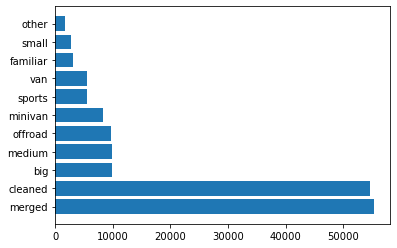

In [38]:
df['type'] = df.type.replace({'fam': 'familiar'})

plt.barh(df.type.value_counts().index, df.type.value_counts().values);

## Trying the new module: car_merger

In [39]:
from modules.car_merger import group_cars, order_att
from modules.car_cleanser import clean_my_car, brand_my_car, paint_my_car, car_dtype

In [40]:
df = group_cars(data_dir='../data/')
df.head()

,title,price,year,kms,city,gear,doors,seats,power,color,...,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration,type,brand,model,gearbox,acc
0,Smart Fortwo Cabrio 52 Mhd Pure Aut.,5.500€,2014,37.125 km,71 cv en Alicante,Automática,2 puertas,2,71 cv,Blanco,...,"4,0 l","4,3 l",780 kg,33 l,"13,7 s",sports,NaN,NaN,NaN,NaN
1,Volkswagen Scirocco 2.0 Tsi,10.900€,02/2009,0 km,200 cv en Barcelona,Manual,3 puertas,4,200 cv,Blanco,...,"6,1 l","7,6 l",1.373 kg,55 l,"7,2 s",sports,NaN,NaN,NaN,NaN
2,Bmw Serie 2 218da Gran Coupé,36.100€,02/2021,NUEVO,150 cv en Cantabria,Automática secuencial,4 puertas,5,150 cv,Saphirschwarz (metalizado),...,"2,9 l","4,2 l",1.545 kg,42 l,"8,5 s",sports,NaN,NaN,NaN,NaN
3,Bmw X4 Xdrive 20d,28.000€,2017,85.000 km,190 cv en Girona,Automática,5 puertas,5,190 cv,Blanco,...,"5,0 l","5,4 l",1.740 kg,67 l,"8,0 s",sports,NaN,NaN,NaN,NaN
4,Dodge Viper Srt-10,27.990€,2005,95.017 km,506 cv,Automática secuencial,2 puertas,2,506 cv,Rojo,...,"14,7 l","21,0 l",1.546 kg,70 l,"3,9 s",sports,NaN,NaN,NaN,NaN


In [41]:
df.shape

(110667, 31)

In [42]:
df[df.index.duplicated()]

,title,price,year,kms,city,gear,doors,seats,power,color,...,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration,type,brand,model,gearbox,acc


In [43]:
df.head()

,title,price,year,kms,city,gear,doors,seats,power,color,...,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration,type,brand,model,gearbox,acc
0,Smart Fortwo Cabrio 52 Mhd Pure Aut.,5.500€,2014,37.125 km,71 cv en Alicante,Automática,2 puertas,2,71 cv,Blanco,...,"4,0 l","4,3 l",780 kg,33 l,"13,7 s",sports,NaN,NaN,NaN,NaN
1,Volkswagen Scirocco 2.0 Tsi,10.900€,02/2009,0 km,200 cv en Barcelona,Manual,3 puertas,4,200 cv,Blanco,...,"6,1 l","7,6 l",1.373 kg,55 l,"7,2 s",sports,NaN,NaN,NaN,NaN
2,Bmw Serie 2 218da Gran Coupé,36.100€,02/2021,NUEVO,150 cv en Cantabria,Automática secuencial,4 puertas,5,150 cv,Saphirschwarz (metalizado),...,"2,9 l","4,2 l",1.545 kg,42 l,"8,5 s",sports,NaN,NaN,NaN,NaN
3,Bmw X4 Xdrive 20d,28.000€,2017,85.000 km,190 cv en Girona,Automática,5 puertas,5,190 cv,Blanco,...,"5,0 l","5,4 l",1.740 kg,67 l,"8,0 s",sports,NaN,NaN,NaN,NaN
4,Dodge Viper Srt-10,27.990€,2005,95.017 km,506 cv,Automática secuencial,2 puertas,2,506 cv,Rojo,...,"14,7 l","21,0 l",1.546 kg,70 l,"3,9 s",sports,NaN,NaN,NaN,NaN


In [44]:
df = clean_my_car(df)
df = brand_my_car(df)
df = paint_my_car(df)
df = order_att(df)
df = car_dtype(df)

df.head()

,title,brand,model,type,year,kms,city,gearbox,doors,seats,...,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acc,price
0,Smart Fortwo Cabrio 52 Mhd Pure Aut.,SMART,FORTWO,sports,2014,37125,Alicante,Automatic,2,2,...,156,0,145,4.6,4.0,4.3,780,33,13.7,5500
1,Volkswagen Scirocco 2.0 Tsi,VOLKSWAGEN,SCIROCCO,sports,2009,0,Barcelona,Manual,3,4,...,181,292,235,9.9,6.1,7.6,1373,55,7.2,10900
2,Bmw Serie 2 218da Gran Coupé,BMW,SERIE 2,sports,2021,0,Cantabria,Automatic,4,5,...,180,430,222,5.4,2.9,4.2,1545,42,8.5,36100
3,Bmw X4 Xdrive 20d,BMW,X4,sports,2017,85000,Girona,Automatic,5,5,...,188,500,212,6.1,5.0,5.4,1740,67,8.0,28000
4,Dodge Viper Srt-10,DODGE,VIPER,sports,2005,95017,Unknown,Automatic,2,2,...,191,0,0,27.3,14.7,21.0,1546,70,3.9,27990


In [45]:
df.dtypes

title             object
brand             object
model             object
type              object
year               int64
kms                int64
city              object
gearbox           object
doors              int64
seats              int64
power              int64
color             object
co2_emiss          int64
fuel_type         object
warranty          object
dealer            object
chassis           object
height             int64
length             int64
width              int64
trunk_vol          int64
max_speed          int64
urban_cons       float64
xtrurban_cons    float64
mixed_cons       float64
weight             int64
tank_vol           int64
acc              float64
price              int64
dtype: object

### The dataset is ready to be used for modeling!

In [47]:
df.to_csv('../data/merged_cars.csv', index=False)